# Challenge: Feedback analysis

Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
imdb = pd.read_csv('C:\\Users\\User\\Documents\\Python_scripts\\Thinkful\\imdb_labelled.txt', sep= '\t', header=None)
print(imdb.shape)

# Rename columns and set everything to lower case
imdb.rename(columns={0:'Texts', 1:'Positive'}, inplace=True)
imdb['Texts'].str.lower()

(748, 2)


0      a very, very, very slow-moving, aimless movie ...
1      not sure who was more lost - the flat characte...
2      attempting artiness with black & white and cle...
3           very little music or anything to speak of.  
4      the best scene in the movie was when gerardo i...
5      the rest of the movie lacks art, charm, meanin...
6                                    wasted two hours.  
7      saw the movie today and thought it was a good ...
8                                   a bit predictable.  
9      loved the casting of jimmy buffet as the scien...
10                  and those baby owls were adorable.  
11     the movie showed a lot of florida at it's best...
12     the songs were the best and the muppets were s...
13                                     it was so cool.  
14     this is a very "right on case" movie that deli...
15     it had some average acting from the main perso...
16     this review is long overdue, since i consider ...
17     i'll put this gem up aga

In [60]:
# A man of few words...
goodwords = ['good', 'great', 'beautiful', 'perfect', 'best', 'greatest', 'enjoy', 'laugh',
             'funny', 'cry', 'cried', 'action', 'gripping', 'cool', 'like']
             
badwords = ['not worth', 'not good', 'not great', 'don’t like', 'didn’t like', 'boring', 
            'don’t recommend', 'average', 'long', 'bad', 'gross',
            'waste', 'slow', 'drag']

# A column for each word
for word in goodwords:
    imdb[word] = imdb['Texts'].str.contains(" " + word + " ")

for word in badwords:
    imdb[word] = imdb['Texts'].str.contains(" " + word + " ")

print(imdb.shape)

(748, 31)


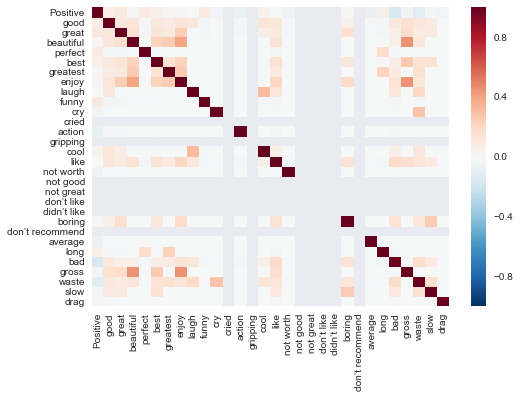

In [61]:
sns.heatmap(imdb.corr())
plt.show()

A couple of correlations, particularly between 'best', 'greatest', 'enjoy' (dropping 'enjoy' probably best way to solve this). Strangly 'gross' is positively correlated with 'beautiful', 'enjoy', and 'best'. 'Waste' is slightly correlated with 'good', 'great' as its arguably picking up the parts of 'not good' and 'not great'?

Some negative correlations too, between 'not good', 'not great', 'don't like', and 'didn't like'.

Keeping it all for now...

In [62]:
# Data is binomial, therefore use Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(imdb.loc[:,'good':'drag'], imdb['Positive'])

# Testing prediction against entire dataset
y_hat = bnb.predict(imdb.loc[:,'good':'drag'])

#Drumroll...
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb.shape[0],
    (imdb['Positive'] != y_hat).sum()))

Number of mislabeled points out of a total 748 points : 318


So only slightly better than a coin toss...

In [66]:
imdb2 = imdb.loc[:,['Texts', 'Positive']]

# Maybe some more words this time

goodwords = ['good', 'great', 'beautiful', 'perfect', 'best', 'greatest', 'enjoy', 'laugh',
             'funny', 'cry', 'cried', 'action', 'gripping', 'cool', 'like', 'delightfull', 
            'gem', 'worth', 'classic', 'treat', 'love']
             
badwords = ['not worth', 'not good', 'not great', 'don’t like', 'didn’t like', 'boring', 
            'don’t recommend', 'average', 'long', 'bad', 'gross', 'awful',
            'slow', 'suck', 'sucked', 'hate','waste', 'drag',]

# A column for each word
for word in goodwords:
    imdb2[word] = imdb2['Texts'].str.contains(" " + word + " ")

for word in badwords:
    imdb2[word] = imdb2['Texts'].str.contains(" " + word + " ")

print(imdb.shape)

bnb = BernoulliNB()
bnb.fit(imdb2.loc[:,'good':'drag'], imdb['Positive'])

# Testing prediction against entire dataset
y_hat = bnb.predict(imdb2.loc[:,'good':'drag'])

#Drumroll...
print("Number of mislabeled points out of a total {} points : {}".format(
    imdb2.shape[0],
    (imdb2['Positive'] != y_hat).sum()))

(748, 31)
Number of mislabeled points out of a total 748 points : 313


Marginally better. The way to improve the model would be a more comprehensive list of positive/ negative sentiment words.

Next I'll apply it to the Yelp model. This is unlikely to go well - while there may be some overlap in the words, many of them won't be applicable.

In [67]:
# Applying the model to another dataset (this is unlikely to go well)

yelp = pd.read_csv('C:\\Users\\User\\Documents\\Python_scripts\\Thinkful\\sentiment\\yelp_labelled.txt', sep= '\t', header=None)
print(imdb.shape)

# Rename columns and set everything to lower case
yelp.rename(columns={0:'Texts', 1:'Positive'}, inplace=True)
yelp['Texts'].str.lower()

for word in goodwords:
    yelp[word] = yelp['Texts'].str.contains(" " + word + " ")

for word in badwords:
    yelp[word] = yelp['Texts'].str.contains(" " + word + " ")

y_hat_yelp = bnb.predict(yelp.loc[:,'good':'drag'])

print("Number of mislabeled points out of a total {} points : {}".format(
    yelp.shape[0],
    (yelp['Positive'] != y_hat_yelp).sum()))

(748, 31)
Number of mislabeled points out of a total 1000 points : 473


So a coin toss it is!